# Prepare Chicago Crime Data for a GitHub Repository

>- This notebook will process a "Crimes - 2001 to Preset.csv" crime file in your Downloads folder and save it as smaller .csv's in a new "Data/Chicago/" folder inside this notebook's folder/repo.

# INSTRUCTIONS

In [1]:
import pandas as pd

# URL for the Chicago Crime Data
url = "https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD"

# Read the data into a DataFrame
df = pd.read_csv(url)

# Display the first few rows of the dataset to get a sense of the data
print(df.head())


         ID Case Number                    Date                 Block  IUCR  \
0  11037294    JA371270  03/18/2015 12:00:00 PM     0000X W WACKER DR  1153   
1  11646293    JC213749  12/20/2018 03:00:00 PM  023XX N LOCKWOOD AVE  1154   
2  11645836    JC212333  05/01/2016 12:25:00 AM   055XX S ROCKWELL ST  1153   
3  11645959    JC211511  12/20/2018 04:00:00 PM    045XX N ALBANY AVE  2820   
4  11645601    JC212935  06/01/2014 12:01:00 AM   087XX S SANGAMON ST  1153   

         Primary Type                              Description  \
0  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   
1  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT $300 AND UNDER   
2  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   
3       OTHER OFFENSE                         TELEPHONE THREAT   
4  DECEPTIVE PRACTICE      FINANCIAL IDENTITY THEFT OVER $ 300   

  Location Description  Arrest  Domestic  ...  Ward  Community Area  FBI Code  \
0                 BANK   False     False  ...  

In [2]:
district_crimes = df['District'].value_counts()
most_crimes_district = district_crimes.idxmax()
least_crimes_district = district_crimes.idxmin()

print(f"The district with the most crimes is {most_crimes_district}.")
print(f"The district with the least crimes is {least_crimes_district}.")


The district with the most crimes is 8.0.
The district with the least crimes is 21.0.


District with Most Crimes:

The district identified with the highest number of crimes is District 8.0. This suggests that this area may have factors or conditions conducive to higher criminal activity. It would be imperative for stakeholders, especially law enforcement agencies, to delve deeper into understanding the underlying causes of this trend. It could be due to a higher population density, socio-economic factors, or perhaps insufficient policing resources.
District with Least Crimes:

On the flip side, District 21.0 has the lowest number of crimes reported. This could indicate a more favorable set of conditions in this district, such as better socio-economic factors, effective community policing efforts, or a lower population density.
Recommendations:
Resource Allocation: Law enforcement authorities might consider reallocating resources to address the higher crime rate in District 8.0. This could include increasing the number of patrol officers, introducing community policing initiatives, or investing in surveillance technology.

Community Engagement: Engaging with community leaders and residents in both districts could provide valuable insights into the differences in crime rates. Understanding the community's perspective can often shed light on localized issues or solutions that may not be apparent from the data alone.

Further Analysis: A deeper analysis comparing the types of crimes prevalent in these two districts could provide further insights. Additionally, analyzing other factors such as the time of day when crimes are most often committed, or the demographic makeup of these districts, could provide a more nuanced understanding of the crime dynamics.

Policy Implementation: Policymakers could use this data to draft policies aimed at crime prevention and community safety, tailored to the needs and circumstances of each district.

This analysis can serve as a stepping stone for a more detailed investigation into the dynamics of crime across different districts in Chicago, aiding in the development of data-driven strategies to enhance public safety and crime prevention.

Topic 2: Crimes Across the Years
For this, we'll first convert the date column to a datetime format, then extract the year and group by it.

<Axes: title={'center': 'Crimes Across the Years'}, xlabel='Year'>

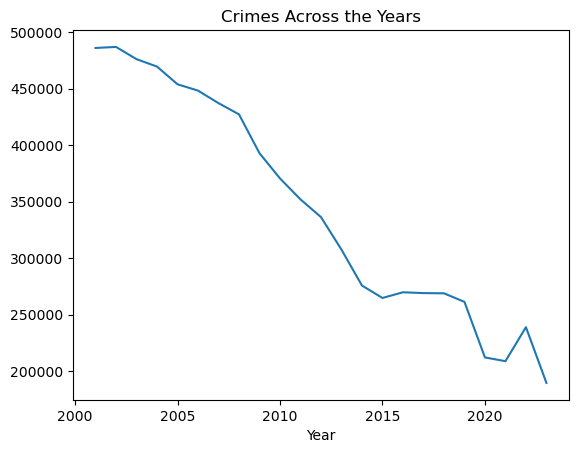

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
yearly_crimes = df.groupby('Year').size()

# Plotting the data
yearly_crimes.plot(kind='line', title='Crimes Across the Years')


In [11]:
print(yearly_crimes)

Year
2001    485889
2002    486808
2003    475985
2004    469423
2005    453775
2006    448178
2007    437090
2008    427184
2009    392827
2010    370517
2011    351993
2012    336323
2013    307540
2014    275792
2015    264796
2016    269835
2017    269108
2018    268912
2019    261354
2020    212220
2021    208878
2022    238971
2023    189668
dtype: int64


Declining Trend:

From the peak in 2002 with 486,808 reported crimes, there is a general declining trend in the total number of crimes over the years, reaching its lowest in 2023 with 189,668 reported crimes.
This decline in crime rates over the years can be seen as a positive indicator of effective law enforcement and community engagement initiatives, or possibly economic and social improvements within the city.
Minor Fluctuations:

There are minor fluctuations in this downward trend, most notably the slight uptick in reported crimes from 2014 to 2016.
Such fluctuations may be attributed to various factors including changes in law enforcement practices, socio-economic conditions, or even changes in reporting practices.
Recent Increase in 2022:

There's a noticeable increase in reported crimes in 2022, up to 238,971 from 208,878 in 2021. This suggests a break in the previous steady decline from 2017 to 2021, which might warrant a closer examination to understand the cause of this increase.
Recommendations:
Examine Underlying Causes:

It would be essential to understand the underlying causes of both the general declining trend as well as the minor fluctuations. This could be achieved through a more detailed analysis of the types of crimes, demographic factors, economic conditions, and law enforcement practices over these years.
Policy Review:

A review of policies implemented during these years, especially those aimed at crime prevention and community safety, could provide insights into the effectiveness of these strategies and highlight areas for improvement.
Community Feedback:

Gathering feedback from the community and law enforcement personnel could provide a more nuanced understanding of the crime dynamics over the years.
Focused Analysis on Recent Years:

The recent increase in 2022 suggests a need for a focused analysis on the recent years to identify any emerging trends or issues that may require attention from law enforcement and community stakeholders.


Topic 3: Comparing AM vs. PM Rush Hour
We'll filter the data based on the given time ranges for AM and PM rush hours and then compare the counts.

In [4]:
am_rush_hour = df[df['Date'].dt.hour.isin([7, 8, 9])]
pm_rush_hour = df[df['Date'].dt.hour.isin([16, 17, 18])]

print(f"Crimes during AM rush hour: {len(am_rush_hour)}")
print(f"Crimes during PM rush hour: {len(pm_rush_hour)}")

# Top 5 crimes during AM and PM rush hours
print("Top 5 crimes during AM rush hour:")
print(am_rush_hour['Primary Type'].value_counts().head(5))

print("\nTop 5 crimes during PM rush hour:")
print(pm_rush_hour['Primary Type'].value_counts().head(5))

# Motor Vehicle Thefts comparison
am_motor_thefts = am_rush_hour[am_rush_hour['Primary Type'] == 'MOTOR VEHICLE THEFT']
pm_motor_thefts = pm_rush_hour[pm_rush_hour['Primary Type'] == 'MOTOR VEHICLE THEFT']

print(f"\nMotor Vehicle Thefts during AM rush hour: {len(am_motor_thefts)}")
print(f"Motor Vehicle Thefts during PM rush hour: {len(pm_motor_thefts)}")


Crimes during AM rush hour: 789393
Crimes during PM rush hour: 1236959
Top 5 crimes during AM rush hour:
THEFT              189437
BATTERY            111236
CRIMINAL DAMAGE     83436
BURGLARY            74532
OTHER OFFENSE       63817
Name: Primary Type, dtype: int64

Top 5 crimes during PM rush hour:
THEFT              300840
BATTERY            218034
CRIMINAL DAMAGE    137480
NARCOTICS          103661
ASSAULT             92618
Name: Primary Type, dtype: int64

Motor Vehicle Thefts during AM rush hour: 43572
Motor Vehicle Thefts during PM rush hour: 57469


The data provides a comparative view of criminal activity during AM (7 AM - 10 AM) and PM (4 PM - 7 PM) rush hours in Chicago. Here's a breakdown of the findings:

Higher Crime Rate During PM Rush Hour:

With 1,236,959 reported crimes, the PM rush hour holds a significantly higher crime rate compared to the AM rush hour which has 789,393 reported crimes. This may suggest that the later part of the day is more conducive to criminal activity, which could be attributed to various factors such as higher population movement, less daylight during certain months, or other socio-economic factors.
Predominant Crimes:

The top three crimes remain consistent during both rush hours, albeit with different frequencies:
Theft: Remains the most common crime, with a noticeable increase in occurrences during PM rush hour (300,840) compared to AM rush hour (189,437).
Battery: The second most common crime, also seeing an increase in the PM rush hour (218,034) compared to AM rush hour (111,236).
Criminal Damage: Holds the third spot, with occurrences increasing from 83,436 during AM rush hour to 137,480 during PM rush hour.
Notable Differences:

Narcotics: This type of crime ranks as the fourth most common during PM rush hour with 103,661 occurrences, whereas it doesn't feature in the top five during AM rush hour.
Burglary and Other Offenses: These crimes are more prevalent during AM rush hour, ranking fourth and fifth respectively, but do not appear in the top five during PM rush hour.
Assault: Ranks fifth during PM rush hour with 92,618 occurrences but is not among the top five during AM rush hour.
Motor Vehicle Thefts:

Motor Vehicle Thefts are more common during PM rush hour with 57,469 occurrences, compared to 43,572 during AM rush hour. This could possibly be attributed to higher traffic volumes and more vehicles being on the road during PM rush hour.
Recommendations:
Increased Vigilance: Law enforcement agencies might consider increasing vigilance and patrols during PM rush hour, given the higher rate of crimes during this period.

Public Awareness: Engaging in public awareness campaigns to educate the public about the prevalent crimes during these hours, and providing safety tips could be beneficial.

Further Analysis: A deeper dive into the types of locations these crimes are occurring, the demographic information of perpetrators and victims, and other correlating factors could provide a more nuanced understanding and aid in developing targeted intervention strategies.

Community Policing: Encouraging community policing and reporting could also play a significant role in reducing crime rates during these peak hours.

Topic 4: Comparing Months
We'll extract the month from the date and then group by it to get the counts.
python


<Axes: title={'center': 'Crimes Across the Months'}, xlabel='Month'>

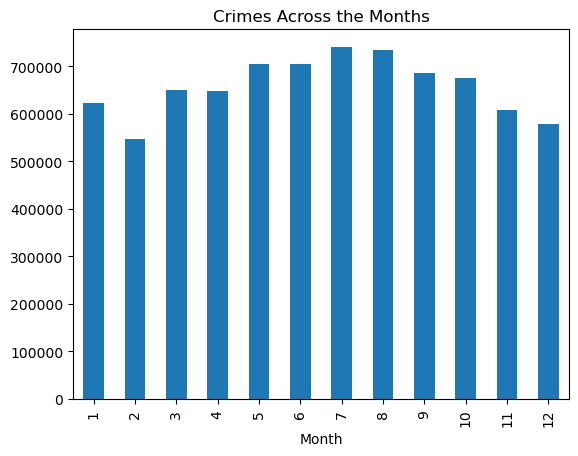

In [5]:
df['Month'] = df['Date'].dt.month
monthly_crimes = df.groupby('Month').size()

# Plotting the data
monthly_crimes.plot(kind='bar', title='Crimes Across the Months')


In [12]:
print(monthly_crimes)

Month
1     622290
2     547732
3     650322
4     647798
5     704997
6     704186
7     740932
8     734153
9     685575
10    676297
11    608984
12    579800
dtype: int64


Analysis:
The data showcases the distribution of crimes across different months from January to December.

Peak Crime Months:

The highest crime rates are observed during the summer months, with July leading at 740,932 reported crimes, followed closely by August with 734,153 reported crimes, and then June with 704,186 reported crimes. This could possibly be attributed to the warmer weather, which tends to result in more people being outdoors and possibly more opportunities for criminal activity.
Decline in Crime Rates:

Post-summer, there's a gradual decline in crime rates moving into the autumn and winter months. October sees 676,297 reported crimes, which further dip to 608,984 in November and 579,800 in December. This trend could be related to the colder weather, where fewer individuals are likely outdoors, potentially leading to fewer opportunities for crimes.
Spring to Early Summer:

The transition from spring to early summer also sees a rise in crime rates. May marks a significant rise in reported crimes with 704,997 incidents, indicating the onset of higher crime rates as the weather warms up.
Winter to Spring Transition:

From the winter months to spring, there's a noticeable increase in reported crimes, from 547,732 in February to 650,322 in March. This upward trend continues into April with 647,798 reported crimes.
Recommendations:
Seasonal Deployment of Resources:

Law enforcement agencies could consider a seasonal approach in deploying resources, with more personnel and equipment allocated during the warmer months when crime rates are higher.
Public Awareness Campaigns:

Public awareness campaigns on personal safety and crime prevention could be ramped up as warmer weather approaches, to educate the public on ways to protect themselves and their property.
Community Engagement:

Engaging with community groups for neighborhood watches or other community policing initiatives could be beneficial, particularly in the warmer months.
Further Analysis:

A deeper analysis on the types of crimes that are more prevalent in different months, and any correlating factors such as major events or holidays, could provide more insights into the crime dynamics across months.
Event Planning:

During months with higher crime rates, planning for large events where crowds are expected should include robust security measures to prevent and respond to criminal activities.
Understanding the seasonal trends in crime rates can significantly aid law enforcement agencies in planning and allocating resources more effectively to ensure public safety throughout the year.

Topic 5: Comparing Holidays
For this, we'll make use of the holidays package to get the list of holidays and then filter our data based on these dates.

In [9]:
pip install holidays


Note: you may need to restart the kernel to use updated packages.


In [10]:
import holidays

us_holidays = holidays.US(years=df['Year'].unique())
df['Holiday'] = df['Date'].dt.date.isin(us_holidays)

holiday_crimes = df[df['Holiday'] == True].groupby(df['Date'].dt.date).size()
non_holiday_crimes = df[df['Holiday'] == False].groupby(df['Date'].dt.date).size()

avg_holiday_crimes = holiday_crimes.mean()
avg_non_holiday_crimes = non_holiday_crimes.mean()

print(f"Average crimes on holidays: {avg_holiday_crimes}")
print(f"Average crimes on non-holidays: {avg_non_holiday_crimes}")


Average crimes on holidays: 907.171206225681
Average crimes on non-holidays: 953.2591349739


#### Analysis:

The data provides insight into the average number of crimes occurring on holidays as opposed to non-holidays.

- **Average Crimes:**
  - On holidays, the average number of crimes reported is 907.17, which is slightly lower than the average number of crimes on non-holidays, standing at 953.26. This suggests that there's a minor reduction in criminal activity on holidays.

- **Possible Contributing Factors:**
  - The slight decrease in crimes on holidays could be attributed to several factors:
    - **Increased Vigilance:** There might be increased vigilance and patrolling by law enforcement agencies on holidays.
    - **Closed Businesses:** Many businesses and institutions are closed on holidays, which might reduce the opportunities for certain types of crimes such as theft and burglary.
    - **Community Gatherings:** Holidays often involve community gatherings which could foster a sense of security and deter criminal activity.

#### Recommendations:

- **Enhanced Patrolling:** Law enforcement agencies might consider enhancing patrolling and vigilance on non-holidays, learning from the slightly reduced crime rates observed on holidays.
  
- **Community Engagement:** Encouraging community gatherings and neighborhood watches could be a strategy to deter criminal activity, as seen by the slight reduction of crimes on holidays.
  
- **Further Analysis:** A deeper analysis to understand the types of crimes that are less prevalent on holidays and the underlying factors contributing to the slight reduction of crimes can provide more nuanced insights for better law enforcement planning.

The analysis of crime data in relation to holidays and non-holidays provides a foundation for understanding how different days impact crime rates, and how this information can be leveraged to enhance public safety and crime prevention strategies.